In [1]:
!pip install kagglehub --quiet
import kagglehub

# Downloads the dataset and returns local path
dataset_root = kagglehub.dataset_download("cjinny/mura-v11")
print("✅ Dataset downloaded to:", dataset_root)

# check content
import os
print("🔍 Top-level contents:", os.listdir(dataset_root))

✅ Dataset downloaded to: /kaggle/input/mura-v11
🔍 Top-level contents: ['MURA-v1.1']


In [2]:
# Add this after dataset_root definition
print("\nActual directories in MURA-v1.1:")
print(os.listdir(dataset_root))


Actual directories in MURA-v1.1:
['MURA-v1.1']


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Streaming output truncated to the last 5000 lines.
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02904/study1_positive/image2.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02751/study1_positive/image1.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02751/study1_positive/image2.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02695/study1_positive/image1.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02730/study1_positive/image1.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02730/study1_positive/image2.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient03101/study1_negative/image1.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient03101/study1_negative/image2.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02953/study1_negative/image1.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02953/study1_negative/image2.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS

In [91]:
import os

print("Top-level contents:", os.listdir(dataset_root))

inner_path = os.path.join(dataset_root, "MURA-v1.1")
print("Contents of MURA-v1.1:", os.listdir(inner_path))

for dirname, _, filenames in os.walk(inner_path):
    for filename in filenames[:3]:
        print(os.path.join(dirname, filename))


Streaming output truncated to the last 5000 lines.
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient03015/study1_negative/image2.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02602/study1_negative/image1.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02602/study1_negative/image2.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02977/study1_negative/image1.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02977/study1_negative/image2.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient03150/study1_negative/image1.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient03150/study1_negative/image2.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02823/study1_positive/image1.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient02823/study1_positive/image2.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS/patient03211/study1_negative/image1.png
/kaggle/input/mura-v11/MURA-v1.1/train/XR_HUMERUS

In [92]:
import pandas as pd

split_counts = {'train': {}, 'valid': {}}

for split in ['train', 'valid']:
    split_path = os.path.join(inner_path, split)
    for part in os.listdir(split_path):
        part_path = os.path.join(split_path, part)
        if os.path.isdir(part_path):
            num_patients = len(os.listdir(part_path))
            split_counts[split][part] = num_patients

df_dist = pd.DataFrame(split_counts).fillna(0).astype(int)
print(df_dist)


             train  valid
XR_WRIST      3267    207
XR_FINGER     1865    166
XR_SHOULDER   2694    173
XR_HAND       1945    159
XR_FOREARM     865    129
XR_HUMERUS     587    132
XR_ELBOW      1711    152


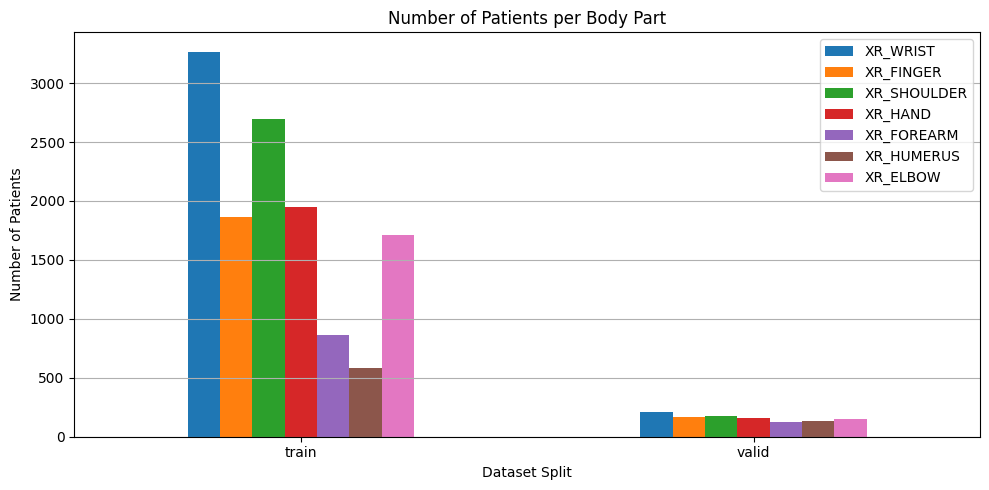

In [93]:
import matplotlib.pyplot as plt

df_dist.T.plot(kind='bar', figsize=(10, 5), title='Number of Patients per Body Part')
plt.xlabel("Dataset Split")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


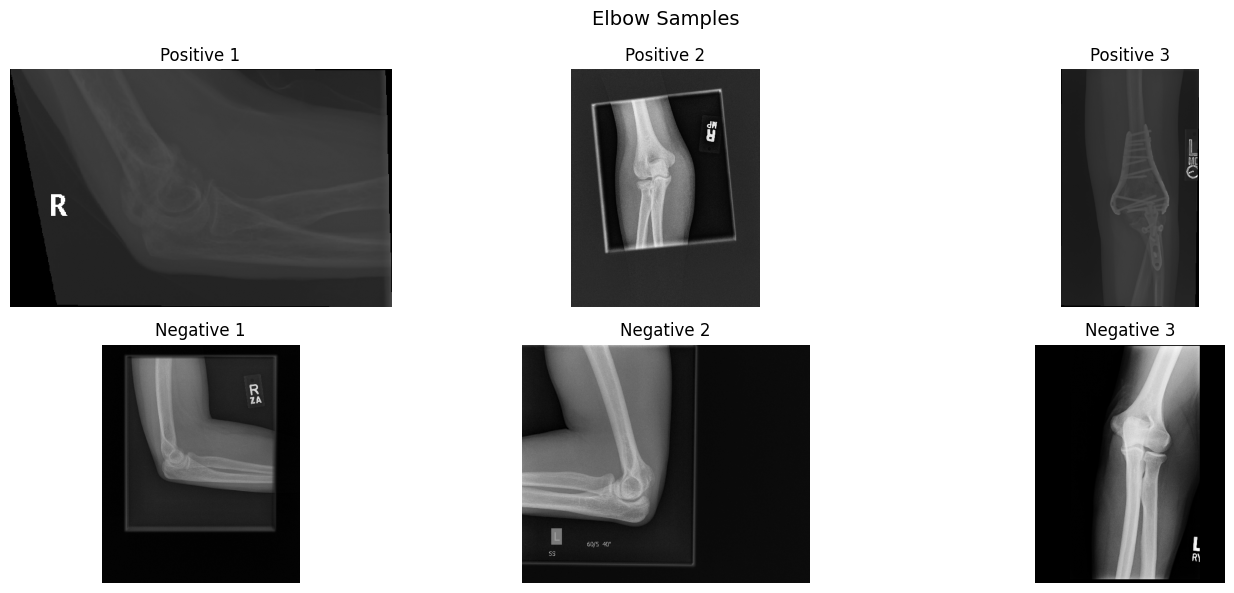

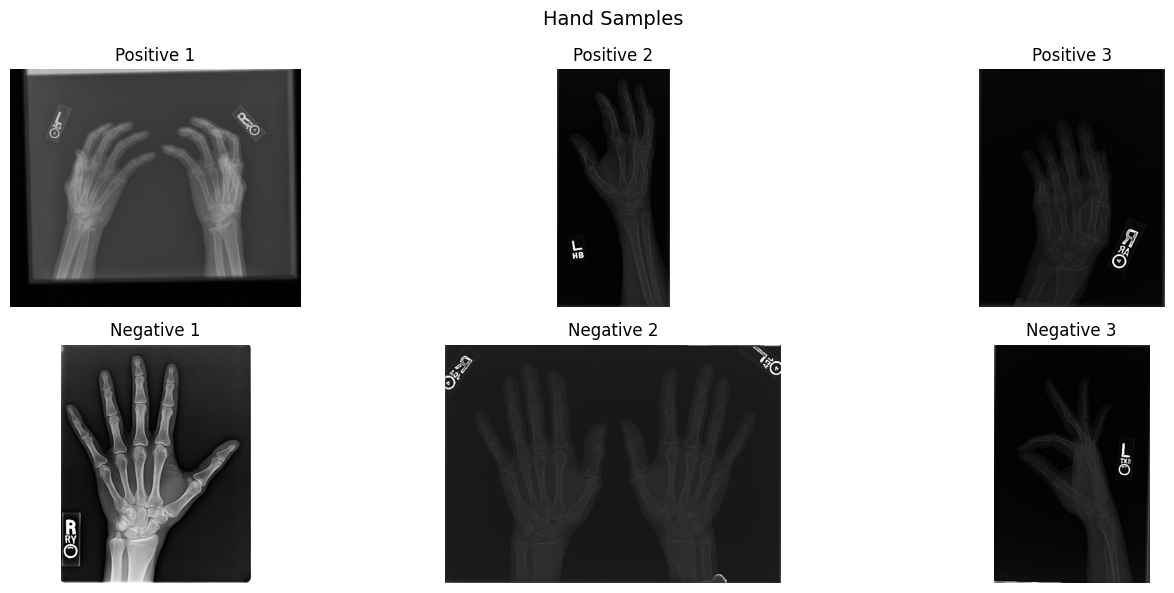

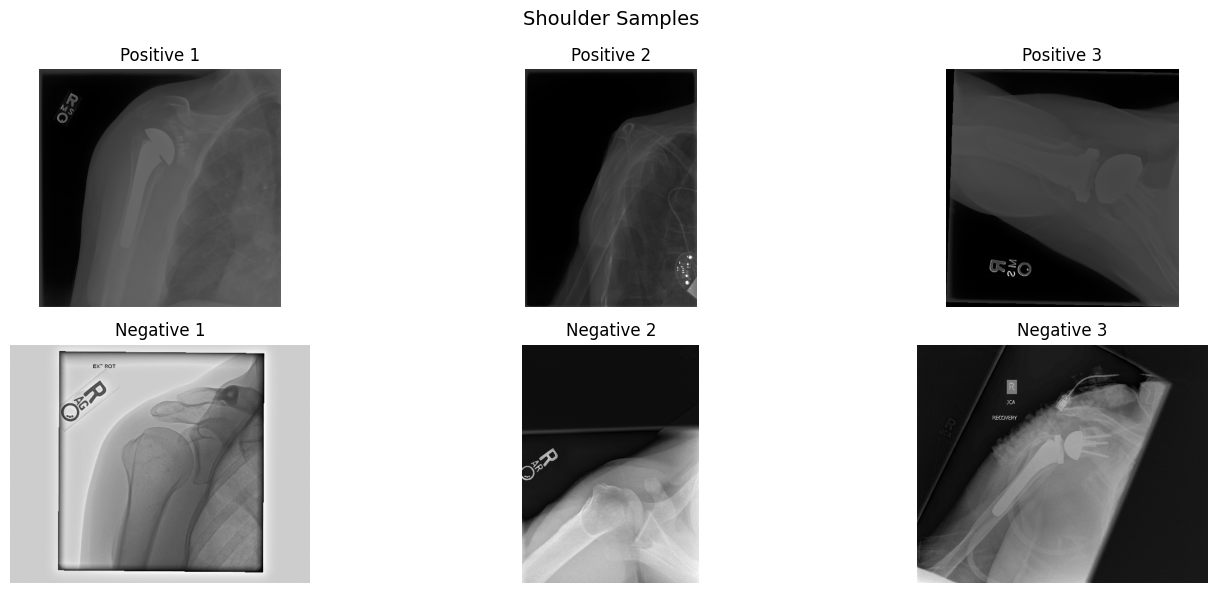

In [94]:
def plot_positive_negative_samples(base_path, body_parts, num_images=3):
    for part in body_parts:
        fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
        folder = os.path.join(base_path, "train", part)
        patient_dirs = os.listdir(folder)

        pos_imgs, neg_imgs = [], []

        for patient in patient_dirs:
            patient_path = os.path.join(folder, patient)
            study_dirs = os.listdir(patient_path)
            for study in study_dirs:
                if len(pos_imgs) < num_images and 'positive' in study.lower():
                    path = os.path.join(patient_path, study)
                    files = os.listdir(path)
                    if files:
                        pos_imgs.append(os.path.join(path, files[0]))
                elif len(neg_imgs) < num_images and 'negative' in study.lower():
                    path = os.path.join(patient_path, study)
                    files = os.listdir(path)
                    if files:
                        neg_imgs.append(os.path.join(path, files[0]))
            if len(pos_imgs) == num_images and len(neg_imgs) == num_images:
                break

        for i, img_path in enumerate(pos_imgs):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            axes[0, i].imshow(img, cmap='gray')
            axes[0, i].axis('off')
            axes[0, i].set_title(f"Positive {i+1}")

        for i, img_path in enumerate(neg_imgs):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            axes[1, i].imshow(img, cmap='gray')
            axes[1, i].axis('off')
            axes[1, i].set_title(f"Negative {i+1}")

        plt.suptitle(f"{part.replace('XR_', '').capitalize()} Samples", fontsize=14)
        plt.tight_layout()
        plt.show()

# Run visualization for 3 selected body parts
plot_positive_negative_samples(inner_path, body_parts=['XR_ELBOW', 'XR_HAND', 'XR_SHOULDER'])


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Model
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.losses import KLDivergence

# Set seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [5]:
train_dir = '/kaggle/input/mura-v11/MURA-v1.1/train'
test_dir = '/kaggle/input/mura-v11/MURA-v1.1/valid'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator()

selected_classes = ["XR_ELBOW", "XR_HAND", "XR_SHOULDER"]

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes,
    shuffle=False
)

print("\nClass Mapping:")
print("Train:", train_generator.class_indices)
print("Test:", test_generator.class_indices)

Found 18853 images belonging to 3 classes.
Found 1488 images belonging to 3 classes.

Class Mapping:
Train: {'XR_ELBOW': 0, 'XR_HAND': 1, 'XR_SHOULDER': 2}
Test: {'XR_ELBOW': 0, 'XR_HAND': 1, 'XR_SHOULDER': 2}


In [6]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + 1e-6))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

In [7]:
# Teacher Model (ResNet50 with logits)
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False

teacher_model = models.Sequential([
    layers.Lambda(lambda x: tf.keras.applications.resnet50.preprocess_input(x)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3)  # Logits output
], name="Teacher_ResNet50")

teacher_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "Teacher_ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
from google.colab import drive
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Mount Google Drive to save the model in it
drive.mount('/content/drive')

# Set up the path where you want to save your model (Google Drive)
model_save_path = '/content/drive/My Drive/teacher_model.h5'

# Create a checkpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    model_save_path,
    monitor='val_loss',  # Monitor validation loss (you can also monitor 'val_accuracy' if preferred)
    verbose=1,
    save_best_only=True,  # Only save the best model (when validation loss improves)
    save_weights_only=False,  # Save the full model, not just weights
    mode='min'  # 'min' since we want to minimize the loss
)

# Compile the teacher model (as you have done earlier)
teacher_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[
        'accuracy',
        F1Score(),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Calculate class weights
class_counts = train_generator.classes
total = len(class_counts)
class_weights = {
    0: total/(3*np.bincount(class_counts)[0]),
    1: total/(3*np.bincount(class_counts)[1]),
    2: total/(3*np.bincount(class_counts)[2])
}

# Train the model with the checkpoint callback
history_teacher = teacher_model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    class_weight=class_weights,
    callbacks=[checkpoint]  # Add the checkpoint callback here
)

# Save the final model after training (if you want to keep it in the session as well)
teacher_model.save('Final_teacher_model.h5')


Mounted at /content/drive
Epoch 1/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.9415 - f1_score: 0.8218 - loss: 0.1640 - precision: 0.7076 - recall: 0.9817
Epoch 1: val_loss improved from inf to 0.02652, saving model to /content/drive/My Drive/teacher_model.h5


590/590 ━━━━━━━━━━━━━━━━━━━━ 437s 720ms/step - accuracy: 0.9415 - f1_score: 0.8219 - loss: 0.1639 - precision: 0.7077 - recall: 0.9817 - val_accuracy: 0.9913 - val_f1_score: 0.9455 - val_loss: 0.0265 - val_precision: 0.8988 - val_recall: 0.9973
Epoch 2/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.9817 - f1_score: 0.9183 - loss: 0.0537 - precision: 0.8550 - recall: 0.9920
Epoch 2: val_loss improved from 0.02652 to 0.02182, saving model to /content/drive/My Drive/teacher_model.h5


590/590 ━━━━━━━━━━━━━━━━━━━━ 329s 558ms/step - accuracy: 0.9817 - f1_score: 0.9183 - loss: 0.0537 - precision: 0.8550 - recall: 0.9920 - val_accuracy: 0.9926 - val_f1_score: 0.9696 - val_loss: 0.0218 - val_precision: 0.9440 - val_recall: 0.9966
Epoch 3/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.9870 - f1_score: 0.9364 - loss: 0.0382 - precision: 0.8863 - recall: 0.9926
Epoch 3: val_loss improved from 0.02182 to 0.01876, saving model to /content/drive/My Drive/teacher_model.h5


590/590 ━━━━━━━━━━━━━━━━━━━━ 380s 555ms/step - accuracy: 0.9871 - f1_score: 0.9364 - loss: 0.0382 - precision: 0.8863 - recall: 0.9926 - val_accuracy: 0.9940 - val_f1_score: 0.9740 - val_loss: 0.0188 - val_precision: 0.9531 - val_recall: 0.9960
Epoch 4/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.9873 - f1_score: 0.9326 - loss: 0.0373 - precision: 0.8770 - recall: 0.9959
Epoch 4: val_loss improved from 0.01876 to 0.01562, saving model to /content/drive/My Drive/teacher_model.h5


590/590 ━━━━━━━━━━━━━━━━━━━━ 328s 555ms/step - accuracy: 0.9873 - f1_score: 0.9326 - loss: 0.0373 - precision: 0.8770 - recall: 0.9959 - val_accuracy: 0.9940 - val_f1_score: 0.9693 - val_loss: 0.0156 - val_precision: 0.9423 - val_recall: 0.9980
Epoch 5/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.9907 - f1_score: 0.9474 - loss: 0.0270 - precision: 0.9038 - recall: 0.9954
Epoch 5: val_loss did not improve from 0.01562
590/590 ━━━━━━━━━━━━━━━━━━━━ 393s 575ms/step - accuracy: 0.9907 - f1_score: 0.9474 - loss: 0.0270 - precision: 0.9038 - recall: 0.9954 - val_accuracy: 0.9926 - val_f1_score: 0.9668 - val_loss: 0.0202 - val_precision: 0.9381 - val_recall: 0.9973
Epoch 6/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.9905 - f1_score: 0.9326 - loss: 0.0280 - precision: 0.8757 - recall: 0.9976
Epoch 6: val_loss did not improve from 0.01562
590/590 ━━━━━━━━━━━━━━━━━━━━ 334s 566ms/step - accuracy: 0.9905 - f1_score: 0.9326 - loss: 0.0280 - precision: 0.8757 - recall: 

590/590 ━━━━━━━━━━━━━━━━━━━━ 319s 541ms/step - accuracy: 0.9909 - f1_score: 0.9189 - loss: 0.0249 - precision: 0.8512 - recall: 0.9986 - val_accuracy: 0.9953 - val_f1_score: 0.9677 - val_loss: 0.0133 - val_precision: 0.9393 - val_recall: 0.9980
Epoch 8/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.9923 - f1_score: 0.9284 - loss: 0.0217 - precision: 0.8676 - recall: 0.9984
Epoch 8: val_loss did not improve from 0.01326
590/590 ━━━━━━━━━━━━━━━━━━━━ 316s 535ms/step - accuracy: 0.9923 - f1_score: 0.9284 - loss: 0.0217 - precision: 0.8676 - recall: 0.9984 - val_accuracy: 0.9960 - val_f1_score: 0.9687 - val_loss: 0.0146 - val_precision: 0.9405 - val_recall: 0.9987
Epoch 9/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.9914 - f1_score: 0.9390 - loss: 0.0240 - precision: 0.8866 - recall: 0.9980
Epoch 9: val_loss did not improve from 0.01326
590/590 ━━━━━━━━━━━━━━━━━━━━ 315s 534ms/step - accuracy: 0.9914 - f1_score: 0.9390 - loss: 0.0240 - precision: 0.8866 - recall: 

In [10]:
def build_student_model():
    model = models.Sequential([
        # Add same preprocessing as teacher
        layers.Lambda(lambda x: tf.keras.applications.resnet50.preprocess_input(x),
                     input_shape=(224, 224, 3)),

        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),  # Output: (26, 26, 128)
        layers.Reshape((26*26, 128)),  # 26x26=676
        layers.LSTM(64),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3)  # Logits
    ], name="Student_DCNN_LSTM")
    return model

student_model = build_student_model()
student_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Student_DCNN_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 676, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,011 (574.26 KB)

 Trainable params: 147,011 (574.26 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
class DistillationModel(Model):
    def __init__(self, student, teacher, class_weights):
        super().__init__()
        self.teacher = teacher
        self.student = student
        self.class_weights = class_weights  # Store as instance variable

    def compile(self, optimizer, metrics, student_loss_fn,
               distillation_loss_fn, alpha=0.5, temperature=5.0):
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        x, y = data

        # Convert class weights to tensor once during init
        sample_weights = tf.gather(tf.constant(self.class_weights),
                                 tf.argmax(y, axis=1))


        # Forward passes
        teacher_pred = self.teacher(x, training=False)
        with tf.GradientTape() as tape:
            student_pred = self.student(x, training=True)

            # Calculate losses
            student_loss = self.student_loss_fn(y, student_pred, sample_weight=sample_weights)
            teacher_probs = tf.nn.softmax(teacher_pred / self.temperature)
            student_probs = tf.nn.softmax(student_pred / self.temperature)
            distillation_loss = self.distillation_loss_fn(teacher_probs, student_probs)

            total_loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Backpropagation
        gradients = tape.gradient(total_loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))

        # Update metrics
        self.compiled_metrics.update_state(y, student_pred)

        # Return metrics
        return {m.name: m.result() for m in self.metrics} | {
            "student_loss": student_loss,
            "distillation_loss": distillation_loss,
            "total_loss": total_loss
        }

    def test_step(self, data):
        x, y = data
        student_pred = self.student(x, training=False)
        student_loss = self.student_loss_fn(y, student_pred)
        self.compiled_metrics.update_state(y, student_pred)
        return {m.name: m.result() for m in self.metrics} | {"student_loss": student_loss}

In [14]:
# Convert class weights dictionary to list format
class_weights_list = [
    class_weights[0],  # XR_ELBOW weight
    class_weights[1],  # XR_HAND weight
    class_weights[2]   # XR_SHOULDER weight
]

# Initialize distillation model
distillation_model = DistillationModel(
    student=student_model,
    teacher=teacher_model,
    class_weights=class_weights_list  # Now using list format
)

# Compile the distillation model
distillation_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy', F1Score(), tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')],
    student_loss_fn=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    distillation_loss_fn=tf.keras.losses.KLDivergence(),
    alpha=0.3,  # Weight between student loss (30%) and distillation loss (70%)
    temperature=4.0  # Softening factor for teacher outputs
)

# Then proceed with the training code:

In [15]:
from google.colab import drive
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Mount Google Drive
drive.mount('/content/drive')

# Create directory for model saving (modify this path as needed)
save_dir = '/content/drive/MyDrive/Thesis_Models'
os.makedirs(save_dir, exist_ok=True)

# Define checkpoint callback
checkpoint_path = os.path.join(save_dir, 'best_student_model.keras')
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

# Modified training code with saving
history_student = distillation_model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint]  # Added checkpoint callback
)

# Save final model explicitly
final_model_path = os.path.join(save_dir, 'final_student_model.keras')
distillation_model.student.save(final_model_path)

# Save training history
import json
history_path = os.path.join(save_dir, 'training_history.json')
with open(history_path, 'w') as f:
    json.dump(history_student.history, f)

print(f"\n✅ Saved to Google Drive:")
print(f"- Best model: {checkpoint_path}")
print(f"- Final model: {final_model_path}")
print(f"- Training history: {history_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:642: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - accuracy: 0.5148 - f1_score: 0.2993 - precision: 0.6526 - recall: 0.1972 - distillation_loss: 0.6812 - loss: -0.3535 - student_loss: 0.9551 - total_loss: 0.7634
Epoch 1: val_loss improved from inf to -0.15326, saving model to /content/drive/MyDrive/Thesis_Models/best_student_model.keras


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


590/590 ━━━━━━━━━━━━━━━━━━━━ 375s 610ms/step - accuracy: 0.5150 - f1_score: 0.2997 - precision: 0.6527 - recall: 0.1976 - distillation_loss: 0.6812 - loss: -0.3535 - student_loss: 0.9553 - total_loss: 0.7634 - val_loss: -0.1533 - val_student_loss: 0.5266
Epoch 2/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.6175 - f1_score: 0.5455 - precision: 0.6379 - recall: 0.4770 - distillation_loss: 0.6060 - loss: -0.1880 - student_loss: 0.8620 - total_loss: 0.6828
Epoch 2: val_loss did not improve from -0.15326
590/590 ━━━━━━━━━━━━━━━━━━━━ 354s 574ms/step - accuracy: 0.6177 - f1_score: 0.5458 - precision: 0.6381 - recall: 0.4774 - distillation_loss: 0.6059 - loss: -0.1880 - student_loss: 0.8622 - total_loss: 0.6828 - val_loss: -0.1338 - val_student_loss: 0.2236
Epoch 3/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.6672 - f1_score: 0.6231 - precision: 0.6630 - recall: 0.5881 - distillation_loss: 0.5756 - loss: -0.2335 - student_loss: 0.8212 - total_loss: 0.6493
Epoch 3:

Available history keys: ['accuracy', 'f1_score', 'precision', 'recall', 'distillation_loss', 'loss', 'student_loss', 'total_loss', 'val_loss', 'val_student_loss']


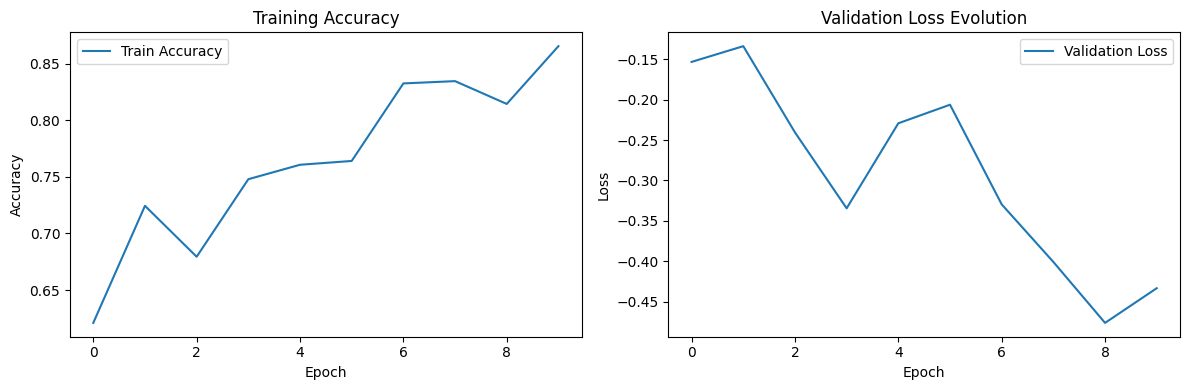

In [16]:
# # Check available keys
# print("Available history keys:", list(history_student.history.keys()))

# # Corrected visualization code
# plt.figure(figsize=(12, 4))

# # Plot training accuracy
# plt.subplot(1, 2, 1)
# plt.plot(history_student.history['accuracy'], label='Train Accuracy')
# plt.title('Training Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()

# # Plot validation loss
# plt.subplot(1, 2, 2)
# plt.plot(history_student.history['val_loss'], label='Validation Loss')
# plt.title('Validation Loss Evolution')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend()

# plt.tight_layout()
# plt.show()

Available history keys: ['accuracy', 'f1_score', 'precision', 'recall', 'distillation_loss', 'loss', 'student_loss', 'total_loss', 'val_loss', 'val_student_loss']


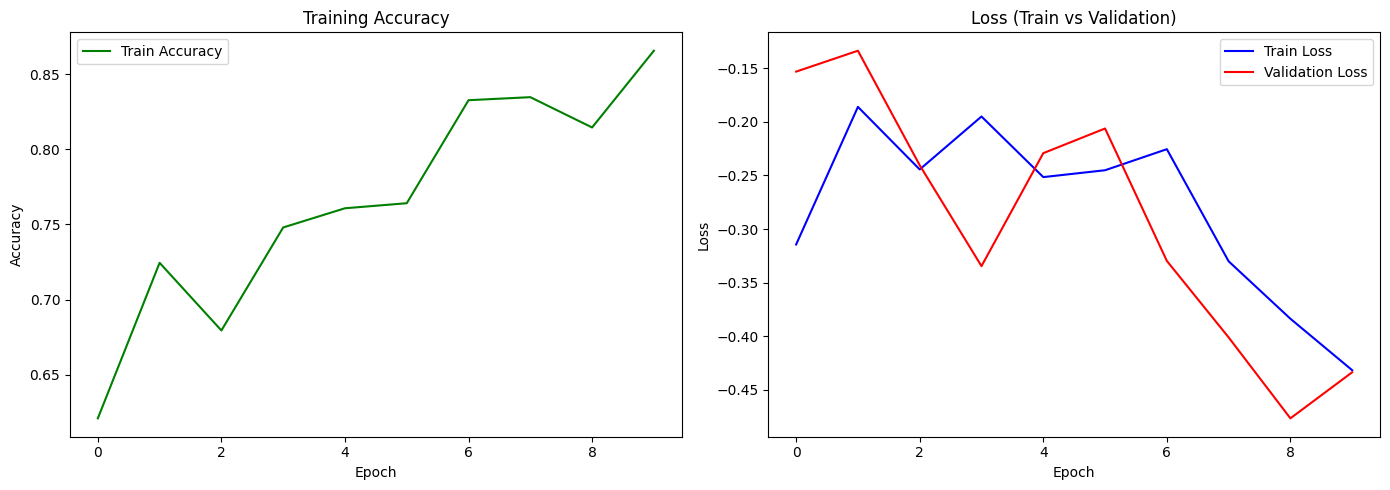

In [18]:
# Check available keys
print("Available history keys:", list(history_student.history.keys()))

# Plotting training accuracy and both training and validation loss
plt.figure(figsize=(14, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_student.history['accuracy'], label='Train Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_student.history['loss'], label='Train Loss', color='blue')
plt.plot(history_student.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss (Train vs Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [99]:

distillation_model.student.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

val_loss, val_acc = distillation_model.student.evaluate(test_generator, verbose=0)
print(f"✅ Final Validation Accuracy: {val_acc:.4f}")


✅ Final Validation Accuracy: 0.8656


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step


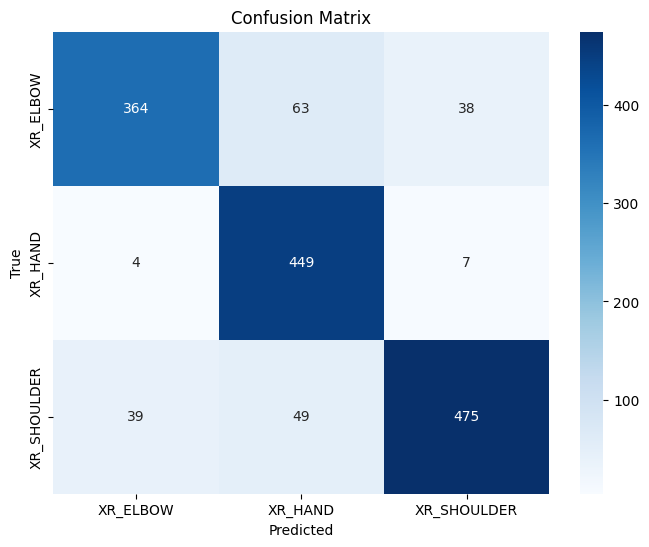


📝 Classification Report:
              precision    recall  f1-score   support

    XR_ELBOW       0.89      0.78      0.83       465
     XR_HAND       0.80      0.98      0.88       460
 XR_SHOULDER       0.91      0.84      0.88       563

    accuracy                           0.87      1488
   macro avg       0.87      0.87      0.86      1488
weighted avg       0.87      0.87      0.86      1488



In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
y_pred = np.argmax(distillation_model.student.predict(test_generator), axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\n📝 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Image 1:
True: XR_SHOULDER  | Pred: XR_ELBOW     | Confidence: 61.20% | ❌
Image 2:
True: XR_ELBOW     | Pred: XR_ELBOW     | Confidence: 85.97% | ✅
Image 3:
True: XR_ELBOW     | Pred: XR_ELBOW     | Confidence: 60.99% | ✅
Image 4:
True: XR_ELBOW     | Pred: XR_ELBOW     | Confidence: 59.49% | ✅
Image 5:
True: XR_HAND      | Pred: XR_ELBOW     | Confidence: 62.24% | ❌


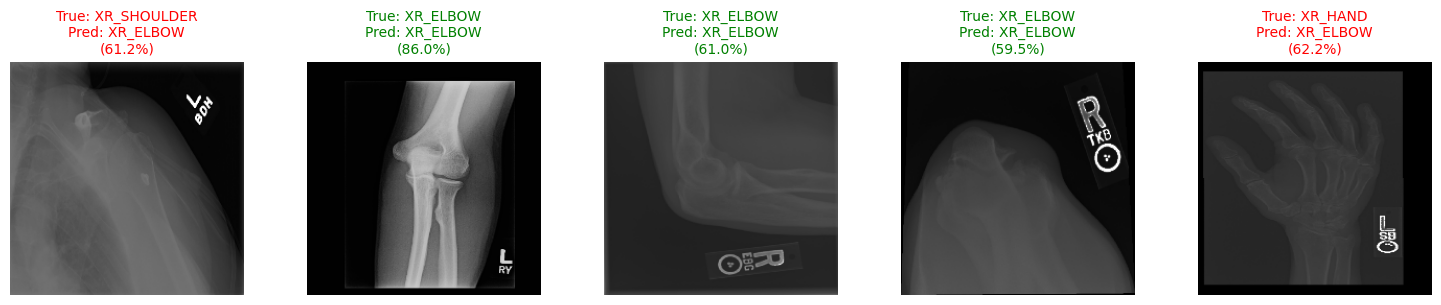

In [50]:
import random

def predict_and_display(num_samples=5):
    test_files = test_generator.filenames
    class_names = list(test_generator.class_indices.keys())

    # Create single figure for all images
    plt.figure(figsize=(15, 3))

    # Get unique random indices
    random_indices = random.sample(range(len(test_files)), num_samples)

    for i, idx in enumerate(random_indices):
        img_path = os.path.join(test_dir, test_files[idx])

        # Load and preprocess image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        preprocessed_img = tf.keras.applications.resnet50.preprocess_input(img)

        # Get prediction
        pred = distillation_model.student.predict(np.expand_dims(preprocessed_img, axis=0), verbose=0)
        probs = tf.nn.softmax(pred[0]).numpy()

        # Get class information
        true_class = test_files[idx].split('/')[0]
        pred_class = class_names[np.argmax(probs)]
        confidence = np.max(probs) * 100
        is_correct = true_class == pred_class

        # Create subplot
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_class}\nPred: {pred_class}\n({confidence:.1f}%)",
                 color='green' if is_correct else 'red', fontsize=10)
        plt.axis('off')

        # Print text results
        print(f"Image {i+1}:")
        print(f"True: {true_class:<12} | Pred: {pred_class:<12} | Confidence: {confidence:.2f}% | {'✅' if is_correct else '❌'}")

    plt.tight_layout()
    plt.show()

# Predict and display 5 random samples in a row
predict_and_display(5)

In [53]:
def predict_and_display(num_samples=3):
    test_files = test_generator.filenames
    class_names = list(test_generator.class_indices.keys())

    # Create single figure for all images
    plt.figure(figsize=(5 * num_samples, 4))

    # Get unique random indices
    random_indices = random.sample(range(len(test_files)), num_samples)

    for i, idx in enumerate(random_indices):
        img_path = os.path.join(test_dir, test_files[idx])

        # Load and preprocess image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        preprocessed_img = tf.keras.applications.resnet50.preprocess_input(img)

        # Get prediction
        pred = distillation_model.student.predict(np.expand_dims(preprocessed_img, axis=0), verbose=0)
        probs = tf.nn.softmax(pred[0]).numpy()

        # Get class information
        true_class = test_files[idx].split('/')[0]
        pred_class = class_names[np.argmax(probs)]
        confidence = np.max(probs) * 100
        is_correct = true_class == pred_class

        # Create subplot
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_class}\nPred: {pred_class}\n({confidence:.1f}%)",
                  color='green' if is_correct else 'red', fontsize=10)
        plt.axis('off')

        # Print text results
        print(f"Image {i + 1}:")
        print(f"True: {true_class:<12} | Pred: {pred_class:<12} | Confidence: {confidence:.2f}% | {'✅' if is_correct else '❌'}")

    plt.tight_layout()
    plt.show()





In [96]:

distillation_model.student.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Evaluate on test/validation set
loss, accuracy = distillation_model.student.evaluate(test_generator, verbose=0)
print(f"✅ Final Validation/Test Accuracy: {accuracy:.4f}")


✅ Final Validation/Test Accuracy: 0.8656


Image 1:
True: XR_ELBOW     | Pred: XR_ELBOW     | Confidence: 61.63% | ✅
Image 2:
True: XR_ELBOW     | Pred: XR_ELBOW     | Confidence: 51.33% | ✅
Image 3:
True: XR_ELBOW     | Pred: XR_ELBOW     | Confidence: 55.78% | ✅


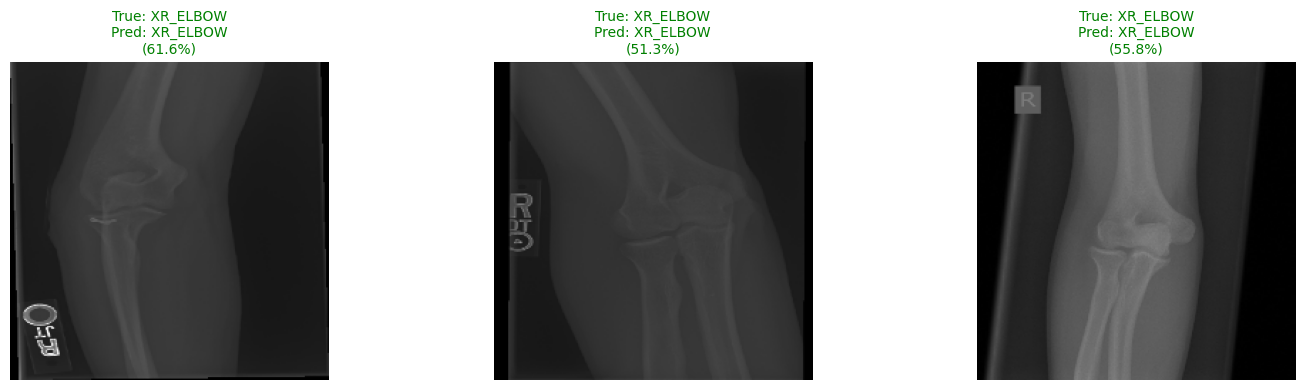

In [81]:
 predict_and_display(3)

In [83]:
distillation_model.student.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='f1_score', curve='PR')  # Approximates F1 via PR AUC
    ]
)


In [84]:
# Evaluate teacher model
teacher_eval = teacher_model.evaluate(test_generator, verbose=0)
teacher_results = {
    'accuracy': teacher_eval[1],
    'f1_score': teacher_eval[2],
    'precision': teacher_eval[3],
    'recall': teacher_eval[4]
}

# Evaluate student model
student_eval = distillation_model.student.evaluate(test_generator, verbose=0)
student_results = {
    'compile_metrics': {
        'accuracy': tf.constant(student_eval[1]),
        'f1_score': tf.constant(student_eval[2]),
        'precision': tf.constant(student_eval[3]),
        'recall': tf.constant(student_eval[4])
    }
}


In [87]:
# The student metrics are stored in a dictionary under 'compile_metrics'
student_metrics = student_results['compile_metrics']

# Create comparison table using dictionary keys
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'Model Size (MB)'],
    'Teacher': [
        teacher_results['accuracy'],
        teacher_results['f1_score'],
        teacher_results['precision'],
        teacher_results['recall'],
        os.path.getsize('/content/Final_teacher_model.h5') / 1e6
    ],
    'Student': [
        student_metrics['accuracy'].numpy(),
        student_metrics['f1_score'].numpy(),
        student_metrics['precision'].numpy(),
        student_metrics['recall'].numpy(),
        os.path.getsize('/content/drive/MyDrive/Thesis_Models/final_student_model.keras') / 1e6
    ]
})

print("📊 Teacher-Student Comparison:")
display(comparison_df)


📊 Teacher-Student Comparison:


,Metric,Teacher,Student
0,Accuracy,0.993952,0.865591
1,F1-Score,0.944992,0.814599
2,Precision,0.896801,0.847446
3,Recall,0.998656,0.822709
4,Model Size (MB),107.362656,0.634053


In [31]:
# # The student metrics are stored in a dictionary under 'compile_metrics'
# student_metrics = student_results['compile_metrics']

# # Create comparison table using dictionary keys
# comparison_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'Model Size (MB)'],
#     'Teacher': [
#         teacher_results['accuracy'],
#         teacher_results['f1_score'],
#         teacher_results['precision'],
#         teacher_results['recall'],
#         os.path.getsize('teacher_model.h5')/1e6
#     ],
#     'Student': [
#         student_metrics['accuracy'].numpy(),  # Convert Tensor to float
#         student_metrics['f1_score'].numpy(),
#         student_metrics['precision'].numpy(),
#         student_metrics['recall'].numpy(),
#         os.path.getsize('/content/drive/MyDrive/Thesis_Models/student_model.keras')/1e6
#     ]
# })

# print("📊 Teacher-Student Comparison:")
# display(comparison_df)

NameError: name 'student_results' is not defined

In [88]:
# Calculate key metrics
accuracy_drop = comparison_df.loc[0, 'Teacher'] - comparison_df.loc[0, 'Student']
size_reduction = (comparison_df.loc[4, 'Teacher'] - comparison_df.loc[4, 'Student'])/comparison_df.loc[4, 'Teacher']

print(f"🔑 Key Findings:")
print(f"- Accuracy Drop: {accuracy_drop:.2%}")
print(f"- Model Size Reduction: {size_reduction:.2%}")
print(f"- F1-Score Retention: {comparison_df.loc[1, 'Student']/comparison_df.loc[1, 'Teacher']:.2%} of teacher's performance")

🔑 Key Findings:
- Accuracy Drop: 12.84%
- Model Size Reduction: 99.41%
- F1-Score Retention: 86.20% of teacher's performance


In [ ]:
!pip install kagglehub --quiet
import kagglehub

# Dataset download
dataset_root = kagglehub.dataset_download("cjinny/mura-v11")
print("✅ Dataset downloaded to:", dataset_root)

# Check content
import os
print("🔍 Top-level contents:", os.listdir(dataset_root))
print("\nActual directories in MURA-v1.1:", os.listdir(dataset_root))

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.applications import EfficientNetV2B0
from google.colab import drive
import json

# Set seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Data directories
train_dir = '/kaggle/input/mura-v11/MURA-v1.1/train'
test_dir = '/kaggle/input/mura-v11/MURA-v1.1/valid'

# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='constant',
    cval=0
)

test_datagen = ImageDataGenerator()

# Selected classes
selected_classes = ["XR_ELBOW", "XR_HAND", "XR_SHOULDER"]

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes,
    shuffle=False
)

print("\nClass Mapping:")
print("Train:", train_generator.class_indices)
print("Test:", test_generator.class_indices)

# Custom F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + 1e-6))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

# Transformer Block (New Component)
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="gelu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Hybrid Loss Function (New Component)
class HybridLoss(tf.keras.losses.Loss):
    def __init__(self, alpha=0.25, gamma=2.0, label_smoothing=0.1):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.label_smoothing = label_smoothing

    def call(self, y_true, y_pred):
        y_true = y_true * (1 - self.label_smoothing) + (self.label_smoothing / 3)
        bce = tf.keras.losses.CategoricalCrossentropy(reduction='none')(y_true, y_pred)
        p_t = tf.reduce_sum(y_true * y_pred, axis=-1)
        focal_loss = self.alpha * tf.pow(1 - p_t, self.gamma) * bce
        return tf.reduce_mean(focal_loss)



✅ Dataset downloaded to: /kaggle/input/mura-v11
🔍 Top-level contents: ['MURA-v1.1']

Actual directories in MURA-v1.1: ['MURA-v1.1']
Found 18853 images belonging to 3 classes.
Found 1488 images belonging to 3 classes.

Class Mapping:
Train: {'XR_ELBOW': 0, 'XR_HAND': 1, 'XR_SHOULDER': 2}
Test: {'XR_ELBOW': 0, 'XR_HAND': 1, 'XR_SHOULDER': 2}


Model: "Teacher_EffNetV2_Transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 49, 1280)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_2             │ (None, 49, 1280)       │    27,548,672 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,471,827 (127.68 MB)

 Trainable params: 27,552,515 (105.10 MB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
# Build Teacher Model with Transformer
def build_teacher_model():
    base_model = EfficientNetV2B0(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs)

    # Transformer integration
    x = layers.Reshape((7*7, 1280))(x)
    x = TransformerBlock(embed_dim=1280, num_heads=4, ff_dim=512)(x)
    x = layers.GlobalAveragePooling1D()(x)

    outputs = layers.Dense(3)(x)  # Logits output

    return Model(inputs=inputs, outputs=outputs, name="Teacher_EffNetV2_Transformer")

teacher_model = build_teacher_model()
teacher_model.summary()

# Calculate class weights
class_counts = train_generator.classes
total = len(class_counts)
class_weights = {
    i: (1 / (count / total)) * 0.33 for i, count in enumerate(np.bincount(class_counts))
}

# Compile teacher
teacher_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=HybridLoss(),
    metrics=['accuracy', F1Score()]
)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

# Train teacher
history_teacher = teacher_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - accuracy: 0.6231 - f1_score: 0.5662 - loss: 0.1376

KeyboardInterrupt: 

In [ ]:
# Build Student Model (Simpler but with attention)
def build_student_model():
    inputs = tf.keras.Input(shape=(224, 224, 3))

    # Feature extractor
    x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(64, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(128, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    # Attention mechanism
    attention = layers.GlobalAveragePooling2D()(x)
    attention = layers.Dense(128, activation='relu')(attention)
    attention = layers.Dense(128, activation='sigmoid')(attention)
    attention = layers.Reshape((1, 1, 128))(attention)
    x = layers.multiply([x, attention])

    # Classifier
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(3)(x)  # Logits

    return Model(inputs=inputs, outputs=outputs, name="Student_DCNN_Attention")

student_model = build_student_model()
student_model.summary()

# Distillation Model (Modified)
class DistillationModel(Model):
    def __init__(self, student, teacher, class_weights):
        super().__init__()
        self.teacher = teacher
        self.student = student
        self.class_weights = class_weights

    def compile(self, optimizer, metrics, student_loss_fn,
               distillation_loss_fn, alpha=0.5, temperature=3.0):
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        x, y = data
        sample_weights = tf.gather(tf.constant(self.class_weights), tf.argmax(y, axis=1))

        with tf.GradientTape() as tape:
            # Teacher predictions
            teacher_pred = self.teacher(x, training=False)

            # Student predictions
            student_pred = self.student(x, training=True)

            # Calculate losses
            student_loss = self.student_loss_fn(y, student_pred, sample_weight=sample_weights)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_pred / self.temperature),
                tf.nn.softmax(student_pred / self.temperature)
            )
            total_loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Update weights
        gradients = tape.gradient(total_loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))

        # Update metrics
        self.compiled_metrics.update_state(y, student_pred)

        return {m.name: m.result() for m in self.metrics} | {
            "student_loss": student_loss,
            "distillation_loss": distillation_loss,
            "total_loss": total_loss
        }

    def test_step(self, data):
        x, y = data
        student_pred = self.student(x, training=False)
        self.compiled_metrics.update_state(y, student_pred)
        return {m.name: m.result() for m in self.metrics}

# Initialize distillation
distillation_model = DistillationModel(
    student=student_model,
    teacher=teacher_model,
    class_weights=class_weights
)

distillation_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy', F1Score()],
    student_loss_fn=HybridLoss(),
    distillation_loss_fn=tf.keras.losses.KLDivergence(),
    alpha=0.7,
    temperature=3.0
)

# Mount Google Drive for saving
drive.mount('/content/drive')
save_dir = '/content/drive/MyDrive/Thesis_Models'
os.makedirs(save_dir, exist_ok=True)

# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(save_dir, 'best_student_model.keras'),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

# Train student
history_student = distillation_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save models and history
teacher_model.save(os.path.join(save_dir, 'teacher_model.keras'))
distillation_model.student.save(os.path.join(save_dir, 'final_student_model.keras'))

with open(os.path.join(save_dir, 'training_history.json'), 'w') as f:
    json.dump(history_student.history, f)

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_student.history['accuracy'], label='Train Accuracy')
plt.plot(history_student.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_student.history['total_loss'], label='Train Loss')
plt.plot(history_student.history['val_total_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluation
y_pred = np.argmax(distillation_model.student.predict(test_generator), axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Model: "Student_DCNN_Attention"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 111, 111,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 54, 54,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 52, 52,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 26, 26,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ max_pooling2d_2[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     16,512 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1, 128) │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 26, 26,    │          0 │ max_pooling2d_2[… │
│                     │ 128)              │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ multiply[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 3)         │        195 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 134,723 (526.26 KB)

 Trainable params: 134,723 (526.26 KB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'teacher_model' is not defined